## 30. 形態素解析結果の読み込み

In [1]:
filename = './neko.txt.mecab'

sentences = []
morphs = []
with open(filename, mode='r') as f:
    for line in f:  # 1行ずつ読込
        if line != 'EOS\n':  # 文末以外：形態素解析情報を辞書型に格納して形態素リストに追加
            fields = line.split('\t')
            if len(fields) != 2 or fields[0] == '':  # 文頭以外の空白と改行文字はスキップ
                continue
            else:
                attr = fields[1].split(',')
                morph = {
                    'surface': fields[0], 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
                morphs.append(morph)
        else:  # 文末：形態素リストを文リストに追加
            sentences.append(morphs)
            morphs = []

# 確認
for morph in sentences[2]:
    print(morph)


{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


## 31. 動詞

In [5]:
ans = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            ans.add(morph['surface'])  # set型なので重複しない要素のみ保持していく

# 確認
print(f'動詞の表層形の種類: {len(ans)}\n')
for v in list(ans)[:10]:
    print(v)


動詞の表層形の種類: 3893

入る
供し
剥い
立て
噛み
中る
構い
すかし
致し
至ら


## 32. 動詞の基本形

In [6]:
ans = set();
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            ans.add(morph['base'])  # set型なので重複しない要素のみ保持していく

# 確認
print(f'動詞の表層形の種類: {len(ans)}\n')
for v in list(ans)[:10]:
    print(v)


動詞の表層形の種類: 2300

入る
図る
中る
こする
謹む
係わる
惚れ込む
溜める
打ち殺す
洒落る


## 33. 「AのB」

In [7]:
ans = set()
for sentence in sentences:
    for i in range(1, len(sentence) - 1):
        if sentence[i - 1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i + 1]['pos'] == '名詞':
            ans.add(sentence[i - 1]['surface'] + sentence[i]['surface'] + sentence[i + 1]['surface'])

# 確認
print(f'AのB: {len(ans)}\n')
for v in list(ans)[:10]:
    print(v)

AのB: 4924

平家の所為
酔っぱらいのよう
前足の運動
町内の同族
主人の一夜作り
取りの妙味
臭の喩
合せの護身
女郎の出来
貧民のよう


## 34. 名詞の連接

In [18]:
ans = set()
for sentence in sentences:
    noun_phrase = ""
    num = 0

    for morph in sentence:
        if morph["pos"] == "名詞":
            noun_phrase += morph["surface"]
            num += 1
        elif num > 1:
            ans.add(noun_phrase)
            noun_phrase = ""
            num = 0
        else:
            noun_phrase = ""
            num = 0
    if num >= 2:
        ans.add(noun_phrase)

# 確認
print(f'連接名詞の種類: {len(ans)}\n')
for n in list(ans)[:10]:
    print(n)


連接名詞の種類: 4457

狆君
葛根湯
七十
翌日食卓
二切
掛念
大変忙
代り鼻
上腹の中
なに芸術


## 35. 単語の出現頻度

In [22]:
import collections

ans = []
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            ans += morph["surface"]

c = collections.Counter(ans)
print(c)


Counter({'の': 12476, 'い': 10299, 'る': 8724, 'て': 8601, 'な': 8571, 'と': 8113, 'に': 7616, 'か': 7303, 'し': 6947, 'は': 6878, 'で': 6226, 'た': 6131, 'を': 6119, 'が': 6000, 'っ': 5629, 'ら': 5552, 'う': 5326, 'も': 5220, 'ん': 4015, 'だ': 3905, 'あ': 3901, 'す': 3680, 'く': 3328, 'れ': 3279, 'ま': 3273, 'り': 3060, 'こ': 2684, 'そ': 2464, '人': 2287, 'よ': 2152, 'え': 1829, 'さ': 1733, '事': 1491, '云': 1423, 'ど': 1404, 'け': 1392, '君': 1315, 'ろ': 1308, 'や': 1300, 'き': 1294, '出': 1233, '見': 1216, 'つ': 1174, 'ち': 1121, 'へ': 1097, '一': 1071, 'ば': 1038, '主': 1024, 'せ': 1011, '来': 978, 'ゃ': 970, 'わ': 941, 'ね': 918, '御': 851, 'じ': 844, '大': 818, '何': 794, 'め': 780, '分': 760, 'お': 752, '上': 749, 'ず': 748, '気': 708, '間': 693, '生': 680, '—': 666, '思': 658, '時': 600, '方': 565, '吾': 535, 'ご': 521, '行': 518, 'ょ': 514, '中': 508, '子': 508, '日': 499, '今': 494, '輩': 485, '心': 482, '知': 464, '自': 438, '聞': 428, '先': 427, '月': 419, '下': 414, 'ほ': 412, '手': 410, '三': 404, '迷': 387, 'み': 377, '入': 368, '無': 363, '少': 350, '二': 349, 

## 36. 頻度上位10語

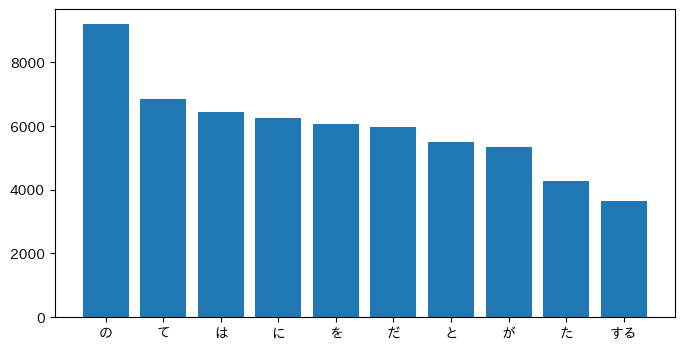

In [4]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from collections import defaultdict 

ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()


## 37. 「猫」と共起頻度の高い上位10語

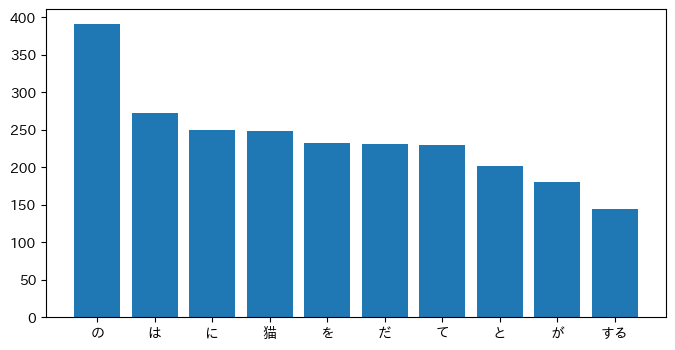

In [6]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from collections import defaultdict

ans = defaultdict(int)
for sentence in sentences:
    if '猫' in [morph['surface'] for morph in sentence]:
        for morph in sentence:
            if morph['pos'] != '記号':
                ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()


## 38. ヒストグラム

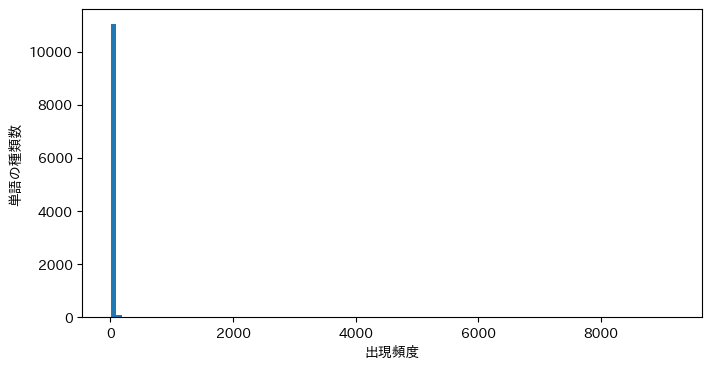

In [14]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from collections import defaultdict 

ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans]

plt.figure(figsize=(8, 4))
plt.hist(values, bins=100)
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.show()

## zipfの法則

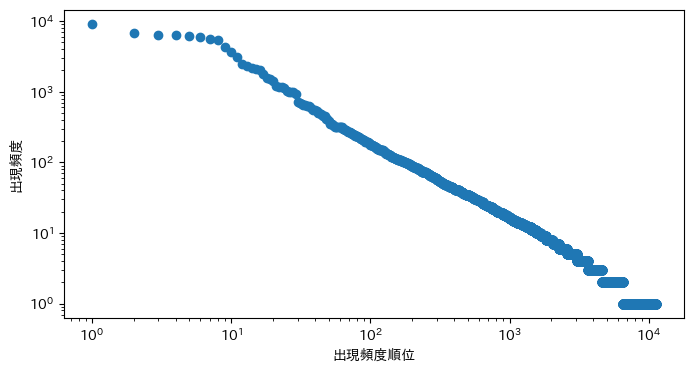

In [16]:
import math

ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            ans[morph['base']] += 1
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

ranks = [r + 1 for r in range(len(ans))]
values = [a[1] for a in ans]
plt.figure(figsize=(8, 4))
plt.scatter(ranks, values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()
